In [20]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image

#  Model deployment

In [21]:
#Defining paths
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Test"

In [22]:
#Training model
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [23]:
#Getting parameters
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 220, 220, 128)     36992     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 110, 110, 128)     0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 110, 110, 128)     0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 108, 108, 64)      73792     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 54, 54, 64)       

# Training data 

In [24]:
#Moulding train images
train_datagen = image.ImageDataGenerator(rescale = 1./255, shear_range = 0.2,zoom_range = 0.2, horizontal_flip = True)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [25]:
#Reshaping test and validation images 
train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')
validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 224 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [33]:
#Training the model
hist_new = model.fit(
    train_generator,
    steps_per_epoch=4,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps=2
)

Epoch 1/10
4/4 [==============================] - 28s 7s/step - loss: 0.2333 - accuracy: 0.9141 - val_loss: 0.1325 - val_accuracy: 0.9667
Epoch 2/10
4/4 [==============================] - 27s 7s/step - loss: 0.1749 - accuracy: 0.9297 - val_loss: 0.1784 - val_accuracy: 0.9667
Epoch 3/10
4/4 [==============================] - 29s 8s/step - loss: 0.1945 - accuracy: 0.9297 - val_loss: 0.1846 - val_accuracy: 0.9833
Epoch 4/10
4/4 [==============================] - 29s 7s/step - loss: 0.2167 - accuracy: 0.9219 - val_loss: 0.1031 - val_accuracy: 0.9833
Epoch 5/10
4/4 [==============================] - 28s 7s/step - loss: 0.1337 - accuracy: 0.9531 - val_loss: 0.1693 - val_accuracy: 0.9667
Epoch 6/10
4/4 [==============================] - 29s 7s/step - loss: 0.1508 - accuracy: 0.9609 - val_loss: 0.0816 - val_accuracy: 0.9833
Epoch 7/10
4/4 [==============================] - 29s 7s/step - loss: 0.0957 - accuracy: 0.9766 - val_loss: 0.0441 - val_accuracy: 0.9833
Epoch 8/10
4/4 [==================

In [34]:
#Getting summary
summary=hist_new.history
print(summary)

{'loss': [0.23328858613967896, 0.17491352558135986, 0.1945316344499588, 0.2166677713394165, 0.13365253806114197, 0.1507907658815384, 0.09566055983304977, 0.1399174928665161, 0.1799430549144745, 0.1662302017211914], 'accuracy': [0.9140625, 0.9296875, 0.9296875, 0.921875, 0.953125, 0.9609375, 0.9765625, 0.9453125, 0.9375, 0.953125], 'val_loss': [0.1324933022260666, 0.17842063307762146, 0.18462207913398743, 0.10305498540401459, 0.16933123767375946, 0.0816391333937645, 0.044139616191387177, 0.08562073111534119, 0.12748773396015167, 0.09275157004594803], 'val_accuracy': [0.9666666388511658, 0.9666666388511658, 0.9833333492279053, 0.9833333492279053, 0.9666666388511658, 0.9833333492279053, 0.9833333492279053, 0.9666666388511658, 0.9666666388511658, 1.0]}


In [46]:
model.save("model_covid.h5")

In [35]:
model.evaluate_generator(train_generator)

[0.12890830636024475, 0.9642857313156128]

In [36]:
print(model.evaluate_generator(validation_generator))

[0.09275157004594803, 1.0]


## Confusion Matrix

In [37]:
import os
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [38]:
y_actual, y_test = [],[]

In [47]:
for i in os.listdir("./CovidDataset/Val/Normal/"):
    img=image.load_img("./CovidDataset/Val/Normal/"+i,target_size=(224,224))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    pred=model.predict(img)
    y_test.append(pred[0,0])
    y_actual.append(1)
    

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [52]:
for i in os.listdir("./CovidDataset/Val/Covid/"):
    img=image.load_img("./CovidDataset/Val/Covid/"+i,target_size=(224,224))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    pred=model.predict(img)
    y_test.append(pred[0,0])
    y_actual.append(0)
    pred

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [53]:
model.predict(img)

array([[0.]], dtype=float32)

In [49]:
y_actual=np.array(y_actual)
y_test=np.array(y_test)

In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cn=confusion_matrix(y_actual,y_test)

<AxesSubplot:>

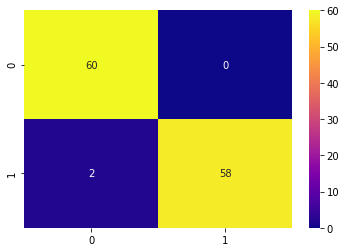

In [51]:
sns.heatmap(cn,cmap="plasma",annot=True) #0: Covid ; 1: Normal